***Import all the needed dependencies***

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

***All we need to define a class***: named as **KMeans**

**Algorithm**
1. *Define a number of clusters*
2. *Initialize centroids randomly*
3. *Assign clusters*
4. *Move clusters*
5. *Check until the centroids of 2nd last and last iteration be same*
6. *If same then stop*

In [4]:
class KMeans:

    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None


    def fit_transform(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for _ in range(self.max_iter):
            #assign_cluster
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            #move_cluster
            self.centroids = self.move_clusters(X, cluster_group)
            #check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group


    def assign_clusters(self, X):
        cluster_group = []
        euclidean_distances = []

        for row in X:
            for centroid in self.centroids:
                euclidean_distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))
            index_pos = np.argmin(euclidean_distances)
            cluster_group.append(index_pos)
            euclidean_distances.clear()

        return np.array(cluster_group)
    

    def move_clusters(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        
        return np.array(new_centroids)

In [5]:
random_points = np.random.randint(0, 200, (200, 2))

kmeans = KMeans(n_clusters=3, max_iter=200)
labels = kmeans.fit_transform(random_points)

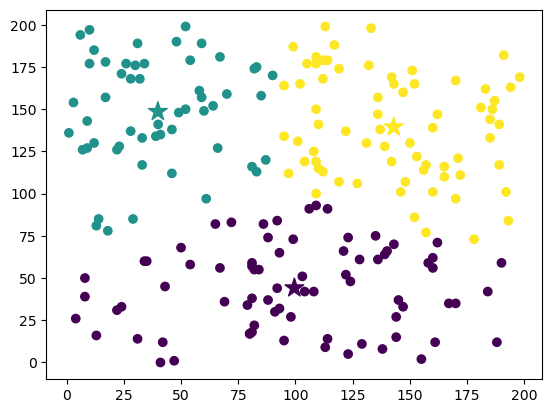

In [6]:
plt.scatter(random_points[:, 0], random_points[:, 1], c = labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c = range(len(kmeans.centroids)),
            marker = '*', s = 200)
plt.show()

In [7]:
from sklearn.datasets import make_blobs

In [8]:
centroids = [(-5, 5), (0, 4), (-2.5, 2.5)]
cluster_std = [1, 1, 1]

In [12]:
X, y = make_blobs(n_samples = 100, cluster_std = cluster_std, centers=centroids, n_features = 2, random_state=1)

In [15]:
kmeans = KMeans(n_clusters=2, max_iter=100)
labels = kmeans.fit_transform(X)

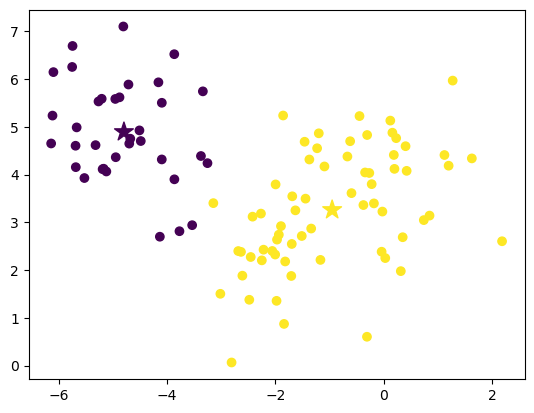

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)),
            marker='*', s=200)
plt.show()